## Alphabet Recognition System using Convolutional Neural Network (CNN)

Convolutional Neural Network (CNN) is a Deep Learning Algorithm widely used for character recognition. This algorithm identifies the alphabet from the given input image.

The accuracy achieved using this algorithm is 93.42%.

## 1. Anvil Integration

In [1]:
import anvil.server
import anvil.media
anvil.server.connect("44STZQZQTYAAVHHWGRPMXDRN-P5VUQGPD3HW5UMWJ")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Authenticated OK


## 2. Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
import os
import pickle

Using TensorFlow backend.


## 3. Defining the Model Architecture

In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))


model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 26, activation = 'softmax'))


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               147584    
_________________________________________________________________
dense_6 (Dense)              (None, 26)               

## 4. Importing the Dataset

In [22]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    directory = 'Training',
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'

)

test_generator = test_datagen.flow_from_directory(
    directory = 'Testing',
    target_size = (32,32),
    batch_size = 32,
    class_mode = 'categorical'

)

Found 501 images belonging to 26 classes.
Found 260 images belonging to 26 classes.


## 5. Training the Model

In [25]:
history = model.fit_generator(train_generator,
                         steps_per_epoch = 16,
                         epochs = 3,
                         validation_data = test_generator,
                         validation_steps = 16)

Epoch 1/3
16/16 [==============================] - 1s 62ms/step - loss: 0.1866 - accuracy: 0.9082 - val_loss: 0.7112 - val_accuracy: 0.8657
Epoch 2/3
16/16 [==============================] - 1s 60ms/step - loss: 0.1769 - accuracy: 0.9301 - val_loss: 0.4118 - val_accuracy: 0.8662
Epoch 3/3
16/16 [==============================] - 1s 54ms/step - loss: 0.1672 - accuracy: 0.9261 - val_loss: 0.2001 - val_accuracy: 0.9342


## 6. Saving/Loading the Model

In [26]:
pickle.dump(model, open('CNN_model.sav', 'wb'))

In [27]:
model = pickle.load(open('CNN_model.sav','rb'))

## 7. Testing the Model

In [28]:
def get_result(result):
    if result[0][0] == 1:
        return('a')
    elif result[0][1] == 1:
        return ('b')
    elif result[0][2] == 1:
        return ('c')
    elif result[0][3] == 1:
        return ('d')
    elif result[0][4] == 1:
        return ('e')
    elif result[0][5] == 1:
        return ('f')
    elif result[0][6] == 1:
        return ('g')
    elif result[0][7] == 1:
        return ('h')
    elif result[0][8] == 1:
        return ('i')
    elif result[0][9] == 1:
        return ('j')
    elif result[0][10] == 1:
        return ('k')
    elif result[0][11] == 1:
        return ('l')
    elif result[0][12] == 1:
        return ('m')
    elif result[0][13] == 1:
        return ('n')
    elif result[0][14] == 1:
        return ('o')
    elif result[0][15] == 1:
        return ('p')
    elif result[0][16] == 1:
        return ('q')
    elif result[0][17] == 1:
        return ('r')
    elif result[0][18] == 1:
        return ('s')
    elif result[0][19] == 1:
        return ('t')
    elif result[0][20] == 1:
        return ('u')
    elif result[0][21] == 1:
        return ('v')
    elif result[0][22] == 1:
        return ('w')
    elif result[0][23] == 1:
        return ('x')
    elif result[0][24] == 1:
        return ('y')
    elif result[0][25] == 1:
        return ('z')

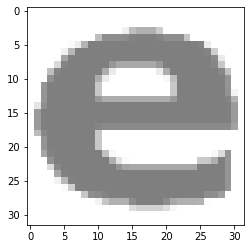

In [29]:
filename = r'Testing\e\25.png'
test_image = image.load_img(filename, target_size = (32,32))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)


In [30]:
result = model.predict(test_image)
result = get_result(result)
print ('Predicted Alphabet is: {}'.format(result))

Predicted Alphabet is: e


## 8. Predicting the Alphabet from the Input Image

This part of code is receives the input image from the anvil website and returns the predicted alphabet back to the website.

In [31]:
@anvil.server.callable
def model_run(path):
    with anvil.media.TempFile(path) as filename:
        test_image = image.load_img(filename, target_size = (32,32))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        result = model.predict(test_image)
        result = get_result(result)
        return ('Predicted Alphabet is: {}'.format(result))
        